# Course end Project 4
Name - Dipankar Chowdhury, 
Objective - As an ML Developer assigned to the HR Department, create ML programs to
1. Perform data quality check for missing values.
2. Understand what factors contributed most to employee tunover

In [8]:
#Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [9]:
df = pd.read_excel("1688640705_hr_comma_sep.xlsx")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [11]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

# No missing values in data

In [12]:
df["left"].unique()

array([1, 0], dtype=int64)

In [13]:
df["number_project"].unique()

array([2, 5, 7, 6, 4, 3], dtype=int64)

In [14]:
df["satisfaction_level"].unique()

array([0.38, 0.8 , 0.11, 0.72, 0.37, 0.41, 0.1 , 0.92, 0.89, 0.42, 0.45,
       0.84, 0.36, 0.78, 0.76, 0.09, 0.46, 0.4 , 0.82, 0.87, 0.57, 0.43,
       0.13, 0.44, 0.39, 0.85, 0.81, 0.9 , 0.74, 0.79, 0.17, 0.24, 0.91,
       0.71, 0.86, 0.14, 0.75, 0.7 , 0.31, 0.73, 0.83, 0.32, 0.54, 0.27,
       0.77, 0.88, 0.48, 0.19, 0.6 , 0.12, 0.61, 0.33, 0.56, 0.47, 0.28,
       0.55, 0.53, 0.59, 0.66, 0.25, 0.34, 0.58, 0.51, 0.35, 0.64, 0.5 ,
       0.23, 0.15, 0.49, 0.3 , 0.63, 0.21, 0.62, 0.29, 0.2 , 0.16, 0.65,
       0.68, 0.67, 0.22, 0.26, 0.99, 0.98, 1.  , 0.52, 0.93, 0.97, 0.69,
       0.94, 0.96, 0.18, 0.95])

In [15]:
df["last_evaluation"].unique()

array([0.53, 0.86, 0.88, 0.87, 0.52, 0.5 , 0.77, 0.85, 1.  , 0.54, 0.81,
       0.92, 0.55, 0.56, 0.47, 0.99, 0.51, 0.89, 0.83, 0.95, 0.57, 0.49,
       0.46, 0.62, 0.94, 0.48, 0.8 , 0.74, 0.7 , 0.78, 0.91, 0.93, 0.98,
       0.97, 0.79, 0.59, 0.84, 0.45, 0.96, 0.68, 0.82, 0.9 , 0.71, 0.6 ,
       0.65, 0.58, 0.72, 0.67, 0.75, 0.73, 0.63, 0.61, 0.76, 0.66, 0.69,
       0.37, 0.64, 0.39, 0.41, 0.43, 0.44, 0.36, 0.38, 0.4 , 0.42])

In [16]:
df["time_spend_company"].unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7], dtype=int64)

In [17]:
df.Work_accident.unique()

array([0, 1], dtype=int64)

In [18]:
df.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [19]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [20]:
dummies=pd.get_dummies(df.sales)
df_Merged = pd.concat([df,dummies],axis='columns')
df_Merged

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,sales,medium,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,sales,medium,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,sales,low,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,sales,low,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,False,False,False,False,False,False,False,False,True,False
14995,0.37,0.48,2,160,3,0,1,0,support,low,False,False,False,False,False,False,False,False,True,False
14996,0.37,0.53,2,143,3,0,1,0,support,low,False,False,False,False,False,False,False,False,True,False
14997,0.11,0.96,6,280,4,0,1,0,support,low,False,False,False,False,False,False,False,False,True,False


In [21]:
df_final = df_Merged.drop(['sales'],axis='columns')
df_final

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,support,technical
0,0.38,0.53,2,157,3,0,1,0,low,False,False,False,False,False,False,False,False,False
1,0.80,0.86,5,262,6,0,1,0,medium,False,False,False,False,False,False,False,False,False
2,0.11,0.88,7,272,4,0,1,0,medium,False,False,False,False,False,False,False,False,False
3,0.72,0.87,5,223,5,0,1,0,low,False,False,False,False,False,False,False,False,False
4,0.37,0.52,2,159,3,0,1,0,low,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,low,False,False,False,False,False,False,False,True,False
14995,0.37,0.48,2,160,3,0,1,0,low,False,False,False,False,False,False,False,True,False
14996,0.37,0.53,2,143,3,0,1,0,low,False,False,False,False,False,False,False,True,False
14997,0.11,0.96,6,280,4,0,1,0,low,False,False,False,False,False,False,False,True,False


In [22]:
from sklearn.preprocessing import OrdinalEncoder
sal = ['low', 'medium', 'high']
enc = OrdinalEncoder(categories=[sal])
#enc.fit_transform(df_final[['salary']])
#df_final['salary'] = enc.fit_transform(df_final[['salary']])
df_final.head(20)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,support,technical
0,0.38,0.53,2,157,3,0,1,0,low,False,False,False,False,False,False,False,False,False
1,0.80,0.86,5,262,6,0,1,0,medium,False,False,False,False,False,False,False,False,False
2,0.11,0.88,7,272,4,0,1,0,medium,False,False,False,False,False,False,False,False,False
3,0.72,0.87,5,223,5,0,1,0,low,False,False,False,False,False,False,False,False,False
4,0.37,0.52,2,159,3,0,1,0,low,False,False,False,False,False,False,False,False,False
5,0.41,0.50,2,153,3,0,1,0,low,False,False,False,False,False,False,False,False,False
6,0.10,0.77,6,247,4,0,1,0,low,False,False,False,False,False,False,False,False,False
7,0.92,0.85,5,259,5,0,1,0,low,False,False,False,False,False,False,False,False,False
8,0.89,1.00,5,224,5,0,1,0,low,False,False,False,False,False,False,False,False,False
9,0.42,0.53,2,142,3,0,1,0,low,False,False,False,False,False,False,False,False,False


In [23]:
df_final.corr()
#df.corr()

ValueError: could not convert string to float: 'low'

In [24]:
plt.figure(figsize=(8,8))
sns.heatmap(df_final.corr(),annot=True)

ValueError: could not convert string to float: 'low'

<Figure size 800x800 with 0 Axes>

In [25]:
df1 = df.groupby(["sales"])["left"].value_counts().reset_index(name="count")
df1 = pd.DataFrame(df1)
df1

,sales,left,count
0,IT,0,954
1,IT,1,273
2,RandD,0,666
3,RandD,1,121
4,accounting,0,563
5,accounting,1,204
6,hr,0,524
7,hr,1,215
8,management,0,539
9,management,1,91


In [26]:
dft = df['sales'].value_counts().reset_index(name="Total")
dft

,sales,Total
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


In [27]:
dfmer = df1.merge(dft,how='left')
dfmer

,sales,left,count,Total
0,IT,0,954,1227
1,IT,1,273,1227
2,RandD,0,666,787
3,RandD,1,121,787
4,accounting,0,563,767
5,accounting,1,204,767
6,hr,0,524,739
7,hr,1,215,739
8,management,0,539,630
9,management,1,91,630


In [28]:
dfmer["normal"] = dfmer["count"].div(dfmer["Total"].values)
dfmer["normal"] = dfmer["normal"]*100
dfmer

,sales,left,count,Total,normal
0,IT,0,954,1227,77.750611
1,IT,1,273,1227,22.249389
2,RandD,0,666,787,84.625159
3,RandD,1,121,787,15.374841
4,accounting,0,563,767,73.402868
5,accounting,1,204,767,26.597132
6,hr,0,524,739,70.906631
7,hr,1,215,739,29.093369
8,management,0,539,630,85.555556
9,management,1,91,630,14.444444


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'IT'),
  Text(1, 0, 'RandD'),
  Text(2, 0, 'accounting'),
  Text(3, 0, 'hr'),
  Text(4, 0, 'management'),
  Text(5, 0, 'marketing'),
  Text(6, 0, 'product_mng'),
  Text(7, 0, 'sales'),
  Text(8, 0, 'support'),
  Text(9, 0, 'technical')])

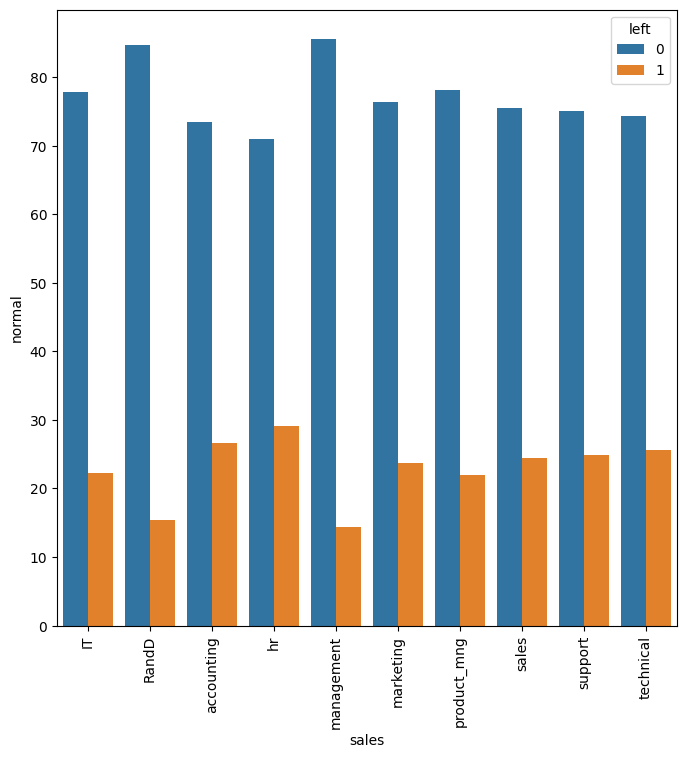

In [29]:
plt.figure(figsize=(8,8))
sns.barplot(x='sales', y='normal', hue='left', data=dfmer)
plt.xticks(rotation=90)

# People from the HR department are leaving the highest based on the normalised  data. The HR department has the highest percentage.
# Normal = (Count of people from leaving category in a department)/(Total no of people in department)*100

In [30]:
df1.head()

,sales,left,count
0,IT,0,954
1,IT,1,273
2,RandD,0,666
3,RandD,1,121
4,accounting,0,563


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'IT'),
  Text(1, 0, 'RandD'),
  Text(2, 0, 'accounting'),
  Text(3, 0, 'hr'),
  Text(4, 0, 'management'),
  Text(5, 0, 'marketing'),
  Text(6, 0, 'product_mng'),
  Text(7, 0, 'sales'),
  Text(8, 0, 'support'),
  Text(9, 0, 'technical')])

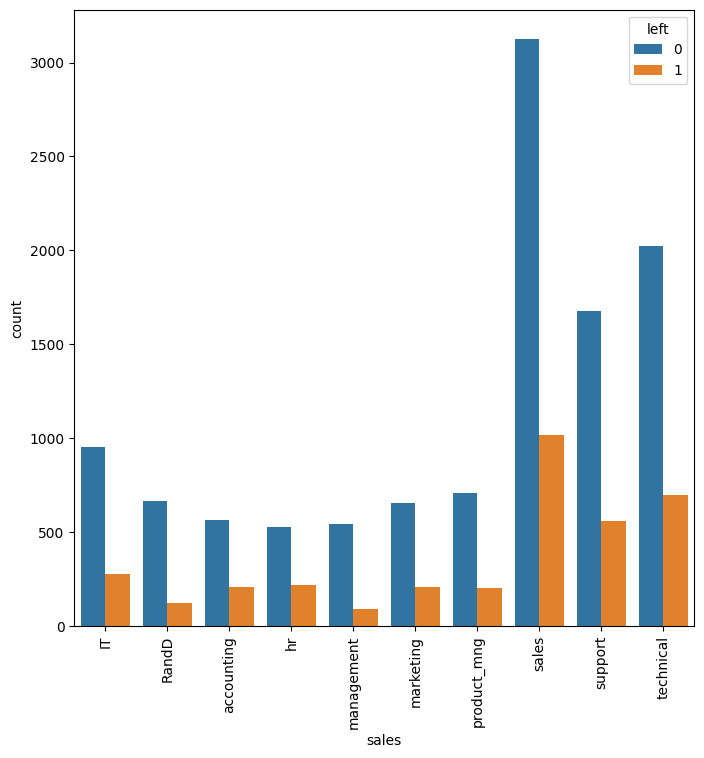

In [31]:
plt.figure(figsize=(8,8))
sns.barplot(x='sales', y='count', hue='left', data=df1)
plt.xticks(rotation=90)

# The people from the sales department are leaving the highest if we look at only the count of leaving people

In [32]:
df2 = df.groupby(["salary"])["left"].value_counts().reset_index(name="count")
df2 = pd.DataFrame(df2)
df2.head()

,salary,left,count
0,high,0,1155
1,high,1,82
2,low,0,5144
3,low,1,2172
4,medium,0,5129


([0, 1, 2], [Text(0, 0, 'high'), Text(1, 0, 'low'), Text(2, 0, 'medium')])

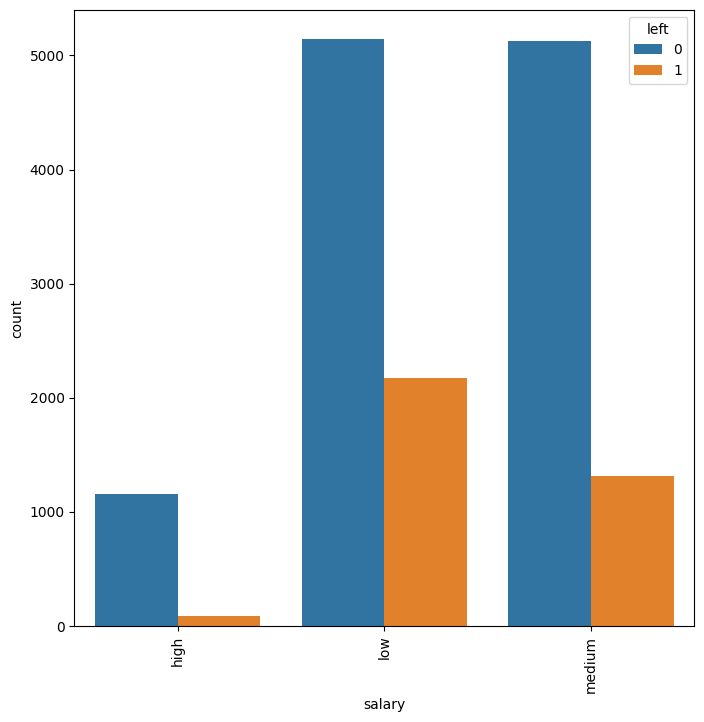

In [33]:
plt.figure(figsize=(8,8))
sns.barplot(x='salary', y='count', hue='left', data=df2)
plt.xticks(rotation=90)

# People with lower salaries are leaving the company

In [34]:
df3 = df.groupby(["time_spend_company"])["left"].value_counts().reset_index(name="count")
df3 = pd.DataFrame(df3)
df3.head()

,time_spend_company,left,count
0,2,0,3191
1,2,1,53
2,3,0,4857
3,3,1,1586
4,4,0,1667


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7'),
  Text(6, 0, '8'),
  Text(7, 0, '10')])

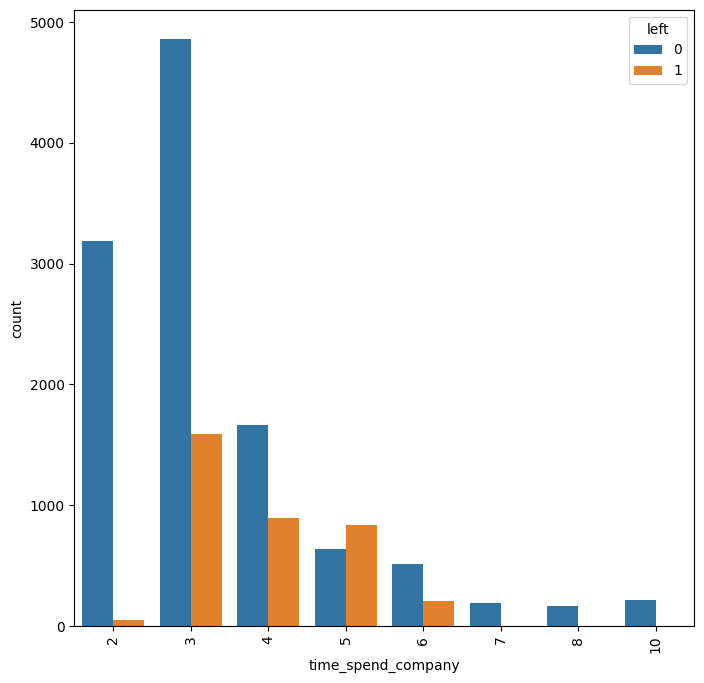

In [35]:
# time_spend_company
plt.figure(figsize=(8,8))
sns.barplot(x='time_spend_company', y='count', hue='left', data=df3)
plt.xticks(rotation=90)

# People with experience of 3 to 5 years are leaving the company more

([0, 1], [Text(0, 0, '0'), Text(1, 0, '1')])

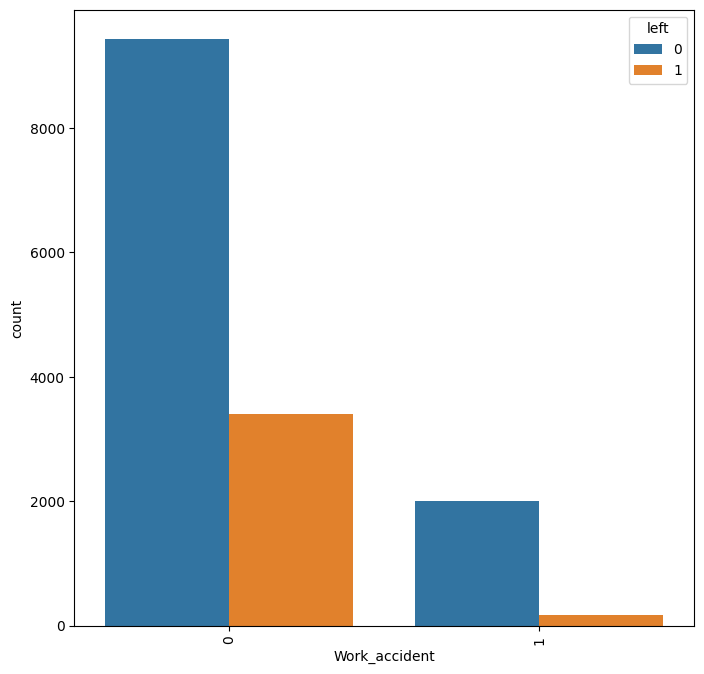

In [36]:
plt.figure(figsize=(8,8))
#sns.countplot(x="Work_accident", y="count", hue="left", data=df)
sns.countplot(x="Work_accident", hue="left", data=df)
plt.xticks(rotation=90)

In [37]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

(array([ 367., 1240., 2733., 1722., 1628., 1712., 1906., 2240., 1127.,
         324.]),
 array([ 96. , 117.4, 138.8, 160.2, 181.6, 203. , 224.4, 245.8, 267.2,
        288.6, 310. ]),
 <BarContainer object of 10 artists>)

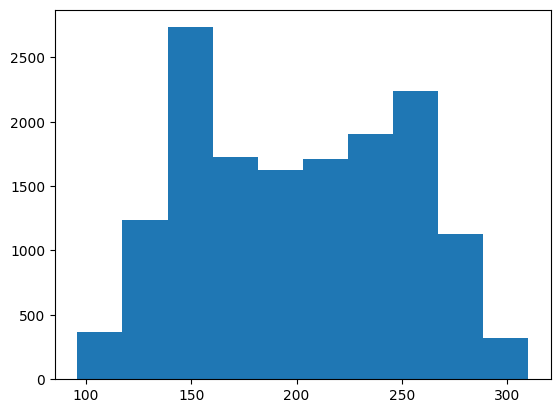

In [38]:
plt.hist(df["average_montly_hours"])

<Axes: xlabel='average_montly_hours', ylabel='Count'>

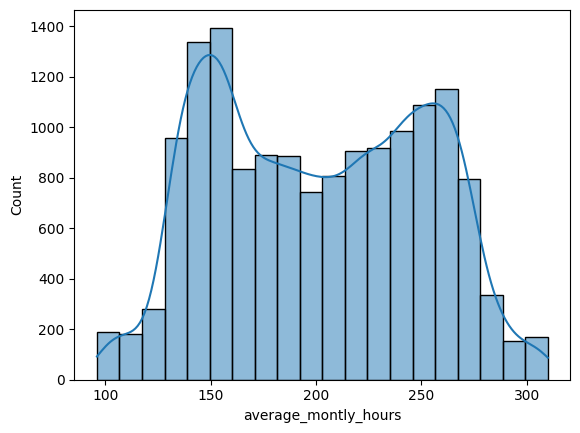

In [39]:
sns.histplot(data=df, x="average_montly_hours", kde = True, bins=20)

<Axes: xlabel='satisfaction_level', ylabel='Count'>

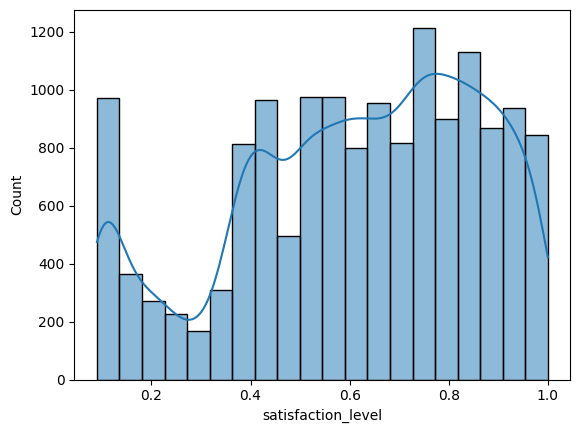

In [40]:
sns.histplot(data = df, x="satisfaction_level", kde=True, bins=20)

<Axes: xlabel='last_evaluation', ylabel='Count'>

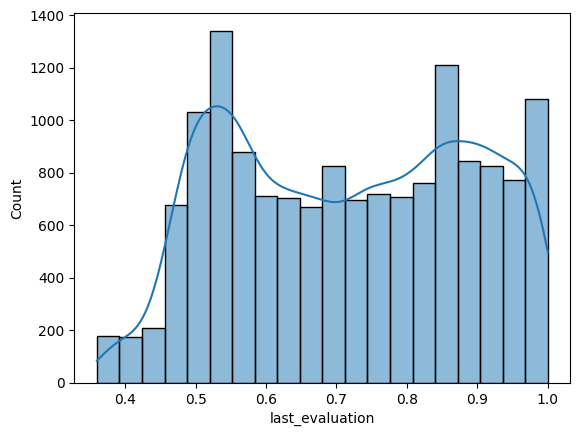

In [41]:
sns.histplot(data = df, x="last_evaluation", kde=True, bins=20)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7')])

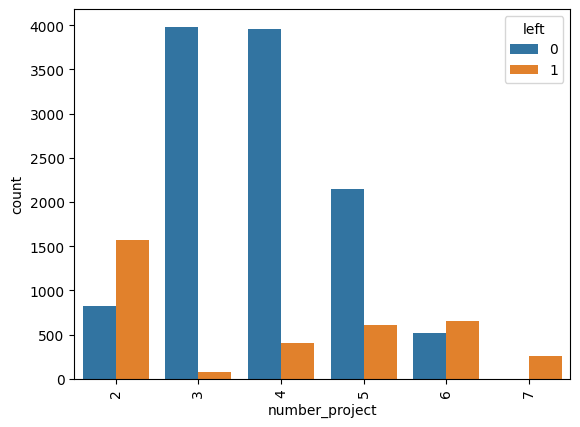

In [42]:
sns.countplot(x="number_project", hue="left", data=df)
plt.xticks(rotation=90)

# People having worked on 2, 5 and 6 have left the organization more often

In [43]:
dfclus = df[["satisfaction_level", "last_evaluation", "left"]]
dfclus

,satisfaction_level,last_evaluation,left
0,0.38,0.53,1
1,0.80,0.86,1
2,0.11,0.88,1
3,0.72,0.87,1
4,0.37,0.52,1
...,...,...,...
14994,0.40,0.57,1
14995,0.37,0.48,1
14996,0.37,0.53,1
14997,0.11,0.96,1


In [44]:
from sklearn.cluster import KMeans

In [45]:
km=dfclus.iloc[:,:].values
kmeans = KMeans(n_clusters=3, random_state=0)
label = kmeans.fit_predict(dfclus)
labelarr = kmeans.fit_predict(km)

In [46]:
label

array([1, 1, 1, ..., 1, 1, 1])

In [47]:
dfclus[label==0].describe()

,satisfaction_level,last_evaluation,left
count,4708.000000,4708.000000,4708.0
mean,0.457984,0.680854,0.0
std,0.153456,0.165609,0.0
min,0.120000,0.360000,0.0
25%,0.350000,0.550000,0.0
50%,0.510000,0.670000,0.0
75%,0.570000,0.810000,0.0
max,0.690000,1.000000,0.0


In [48]:
dfclus[label==1].describe()

,satisfaction_level,last_evaluation,left
count,3571.000000,3571.000000,3571.0
mean,0.440098,0.718113,1.0
std,0.263933,0.197673,0.0
min,0.090000,0.450000,1.0
25%,0.130000,0.520000,1.0
50%,0.410000,0.790000,1.0
75%,0.730000,0.900000,1.0
max,0.920000,1.000000,1.0


In [49]:
dfclus[label==2].describe()

,satisfaction_level,last_evaluation,left
count,6720.000000,6720.000000,6720.0
mean,0.813112,0.739728,0.0
std,0.108167,0.154900,0.0
min,0.590000,0.360000,0.0
25%,0.720000,0.610000,0.0
50%,0.810000,0.740000,0.0
75%,0.910000,0.870000,0.0
max,1.000000,1.000000,0.0


In [50]:
km[label==0,1]

array([0.74, 0.69, 0.6 , ..., 0.94, 0.65, 0.73])

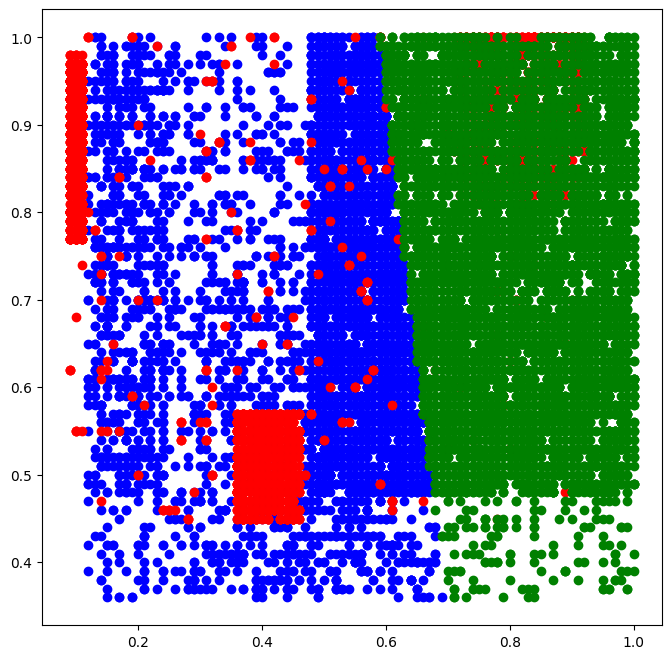

In [51]:
plt.figure(figsize=(8,8))
plt.scatter(km[label==0,0],km[label==0,1],color="blue")
plt.scatter(km[label==1,0],km[label==1,1],color="red")
plt.scatter(km[label==2,0],km[label==2,1],color="green")

# 1. The blue cluster denotes people with the best satisfaction levels and scored high in the last evaluation.
# 2. The red cluster denotes people with medium satisgaction levels and scored average to high in the last evaluation.
# 3. The green cluster denotes people with lower satisfaction levels and scored failrly than the above mentioned clusters.

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [53]:
df_numerical = df.select_dtypes(include=['int64', 'float64'])
df_categorical = df.select_dtypes(include=['object'])

# Converting the categorical data into numerical using one hot encoding

In [54]:
df_converted = pd.get_dummies(data=df_categorical)
df_converted.head()

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,False,False,False,False,False,False,False,True,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False,False,False,False,True
2,False,False,False,False,False,False,False,True,False,False,False,False,True
3,False,False,False,False,False,False,False,True,False,False,False,True,False
4,False,False,False,False,False,False,False,True,False,False,False,True,False


In [55]:
dfn = pd.concat([df_numerical, df_converted], axis=1, join="inner")
dfn.shape

(14999, 21)

In [56]:
dfn.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False


# Splitting the data into training and testing in the ration of 80:20 with random state = 123

In [58]:
x = dfn.drop("left",axis=1)
y = dfn["left"]

In [59]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=123)

In [60]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((11999, 20), (3000, 20), (11999,), (3000,))

In [61]:
ytrain.value_counts()

left
0    9137
1    2862
Name: count, dtype: int64

# The data is highly imbalanced for the tr dataset as the record of people who left is very low in comparision to the record of people who didn'tleave

## Using SMOTE to handle the imbalance for the left category

In [62]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
xtrainres, ytrainres = sm.fit_resample(xtrain, ytrain)


In [63]:
ytrainres.value_counts()

left
0    9137
1    9137
Name: count, dtype: int64

In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics

In [65]:
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)

In [66]:
print(cross_val_score(logreg, xtrainres, ytrainres, cv=5).mean())

0.8050251397003603


In [67]:
logreg.fit(xtrainres,ytrainres)
ypred = logreg.predict(xtest)

In [68]:
from sklearn.metrics import classification_report

# Logistic Regression Report

In [69]:
metrics.confusion_matrix(ytest,ypred)

array([[1830,  461],
       [ 229,  480]], dtype=int64)

In [70]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      2291
           1       0.51      0.68      0.58       709

    accuracy                           0.77      3000
   macro avg       0.70      0.74      0.71      3000
weighted avg       0.80      0.77      0.78      3000



In [71]:
roc_auc_score(ytest,ypred)

0.7378938496686919

[0.         0.20122217 1.        ]
[0.         0.67700987 1.        ]
[inf  1.  0.]
0.7378938496686919


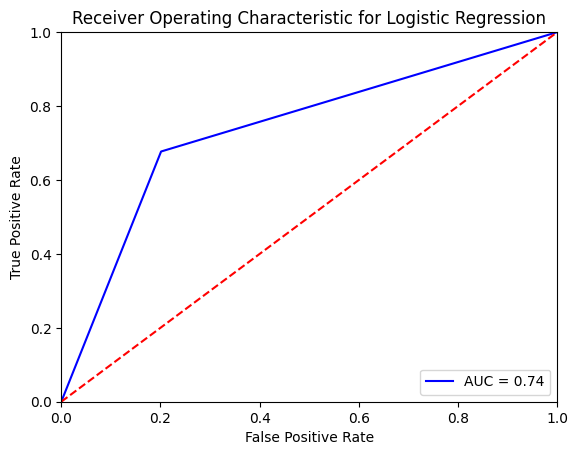

In [73]:
fpr, tpr, threshold = metrics.roc_curve(ytest, ypred)
print(fpr)
print(tpr)
print(threshold)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

# method I:plt
plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Random Forest Classifier

In [75]:
randm = RandomForestClassifier(max_depth=5)


In [76]:
print(cross_val_score(randm, xtrainres, ytrainres, cv=5).mean())

0.949381649478824


In [77]:
randm.fit(xtrainres,ytrainres)
ypred1=randm.predict(xtest)

# Random Forest Classifier Report

In [78]:
metrics.confusion_matrix(ytest, ypred1)

array([[2218,   73],
       [  57,  652]], dtype=int64)

In [79]:
print(classification_report(ytest, ypred1))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2291
           1       0.90      0.92      0.91       709

    accuracy                           0.96      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.96      0.96      0.96      3000



In [80]:
roc_auc_score(ytest,ypred1)

0.9438706313230344

[0.         0.03186381 1.        ]
[0.         0.91960508 1.        ]
[inf  1.  0.]
0.9438706313230344


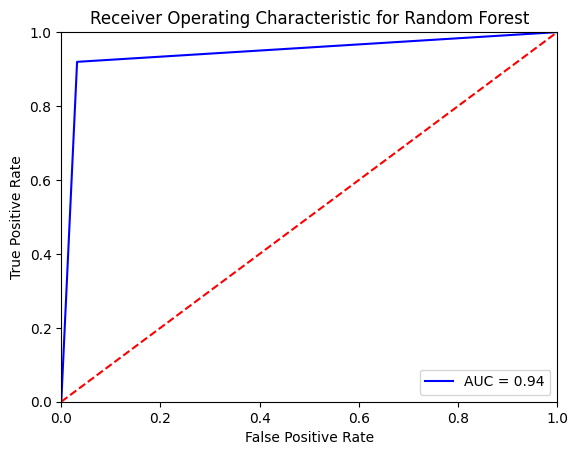

In [82]:
fpr, tpr, threshold = metrics.roc_curve(ytest, ypred1)
print(fpr)
print(tpr)
print(threshold)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

# method I:plt
plt.title('Receiver Operating Characteristic for Random Forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Gradient Boosting Classifier

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

In [86]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

In [87]:
print(cross_val_score(gb, xtrainres, ytrainres, cv=5).mean())

0.9479043560754963


In [88]:
gb.fit(xtrainres, ytrainres)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [89]:
ypred2 = gb.predict(xtest)

# Gradient Boosting Classification Report

In [90]:
metrics.confusion_matrix(ytest, ypred2)

array([[2168,  123],
       [  46,  663]], dtype=int64)

In [91]:
print(classification_report(ytest, ypred2))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2291
           1       0.84      0.94      0.89       709

    accuracy                           0.94      3000
   macro avg       0.91      0.94      0.92      3000
weighted avg       0.95      0.94      0.94      3000



In [92]:
roc_auc_score(ytest, ypred2)

0.9407157707322269

[0.         0.05368835 1.        ]
[0.         0.93511989 1.        ]
[inf  1.  0.]
0.9407157707322269


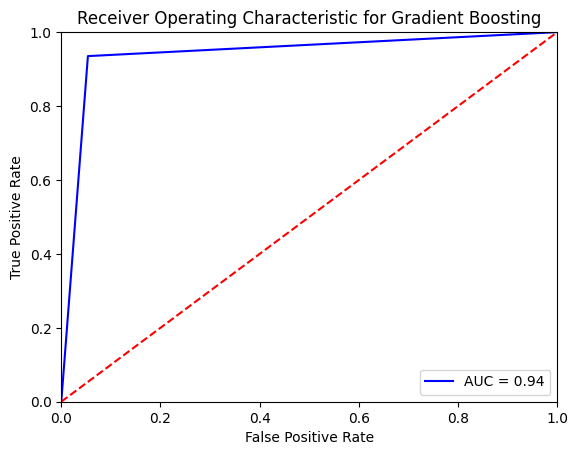

In [93]:
fpr, tpr, threshold = metrics.roc_curve(ytest, ypred2)
print(fpr)
print(tpr)
print(threshold)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

# method I:plt
plt.title('Receiver Operating Characteristic for Gradient Boosting')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Based on confusion matrix, the false negatives should be low because if an employee who might leave the 
organisation is misclassified as someone who won't leave then adequate strategies to retain that person will not 
be implemented, hence recall is better metric to be analysed.

In [94]:
col = xtrainres.columns
col

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

# Since Random Forest shows highest accuracy with good f1 score, it is concluded that Random Forest is the best
# performing model.

In [95]:
feature_labels = np.array(col)

In [96]:
importance = randm.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index]*100)))

sales_marketing-0.01%
sales_IT-0.01%
sales_product_mng-0.01%
sales_RandD-0.02%
sales_accounting-0.03%
sales_management-0.04%
sales_hr-0.08%
sales_support-0.10%
sales_sales-0.14%
promotion_last_5years-0.22%
sales_technical-0.23%
salary_medium-0.34%
salary_high-1.25%
salary_low-1.75%
Work_accident-4.18%
last_evaluation-10.25%
average_montly_hours-11.30%
number_project-18.84%
time_spend_company-21.02%
satisfaction_level-30.18%


# Above factors influences the turnover in ascending order. it can identified that the employee
# turnover is highly influenced by the employee's satisfaction level in the organisation. Improvement
# of work and organisation culture within the organisation can be a good way to prevent the 
# employees from leaving the organisation

In [97]:
predict_probability = randm.predict_proba(xtest)

In [98]:
predict_probability[:,1]

array([0.04819031, 0.11960479, 0.12130909, ..., 0.69100958, 0.07863056,
       0.143772  ])

In [99]:
zone=[]
prob=[]

for i in predict_probability[:,1]:
    prob.append(i)
    if(i<=0.2):
        zone.append("Safe Zone")
    elif(i>0.2 and i<=0.6):
        zone.append("Low Risk Zone")
    elif(i>0.6 and i<=0.9):
        zone.append("Medium Risk Zone")
    else:
        zone.append("High Risk Zone")

In [100]:
categories = ["Safe Zone", "Low Risk Zone", "Medium Risk Zone", "High Risk Zone"]
color = ["Green", "Yellow", "Orange", "Red"]

In [101]:
colordict = dict(zip(categories, color))

In [102]:
clr = pd.DataFrame({"zone":zone, "probability":prob})

In [103]:
clr["zone"].unique()

array(['Safe Zone', 'High Risk Zone', 'Medium Risk Zone', 'Low Risk Zone'],
      dtype=object)

In [104]:
clr["Color"] = clr["zone"].apply(lambda x: colordict[x])

In [105]:
clr.head(10)

,zone,probability,Color
0,Safe Zone,0.048190,Green
1,Safe Zone,0.119605,Green
2,Safe Zone,0.121309,Green
3,Safe Zone,0.117546,Green
4,Safe Zone,0.119624,Green
5,Safe Zone,0.102652,Green
6,High Risk Zone,0.942307,Red
7,Medium Risk Zone,0.715325,Orange
8,Safe Zone,0.153186,Green
9,Safe Zone,0.053697,Green


In [106]:
color = clr["Color"].tolist()

In [107]:
c = ["Green","Red","Orange","Yellow"]

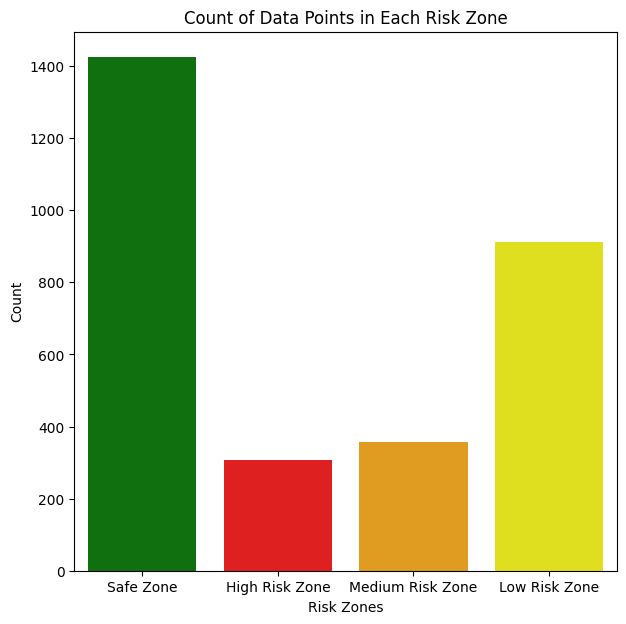

In [108]:
# Assuming 'zone' contains the categorical risk zone labels
# create a Data Frame with the 'zone' data
data_df = pd.DataFrame({'Risk Zones': zone})

plt.figure(figsize=(7,7))
sns.countplot(data=data_df, x='Risk Zones', palette=c)
plt.xlabel('Risk Zones')
plt.ylabel('Count')
plt.title('Count of Data Points in Each Risk Zone')
plt.show()